Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load the dataset

In [9]:
data = pd.read_csv("D:/Personal projects/House price prediction/house_price_dataset.csv")

#check dataset Statistics information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  500 non-null    int64  
 1   Bedrooms        500 non-null    int64  
 2   Age             500 non-null    int64  
 3   Price           500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [4]:
#Display the first few rows
data.head()

,Square_Footage,Bedrooms,Age,Price
0,1360,1,46,3.353194e+05
1,4272,1,49,8.435824e+05
2,3592,3,1,8.081290e+05
3,966,5,27,3.962554e+05
4,4926,4,48,1.175721e+06


In [6]:
#check for shape of the dataset
data.shape

(500, 4)

In [8]:
#check for Missing values
data.isnull().sum()

Square_Footage    0
Bedrooms          0
Age               0
Price             0
dtype: int64

Exploratory Data Analysis(EDA)

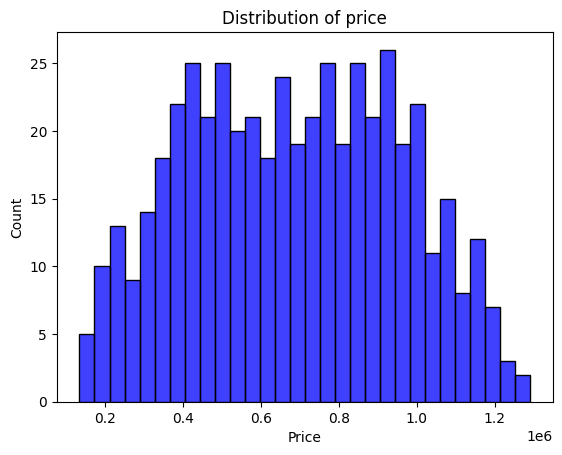

In [ ]:
sns.histplot(data['Price'],kde=True, bins=30, color='blue')
plt.title("Distribution of price")
plt.show()

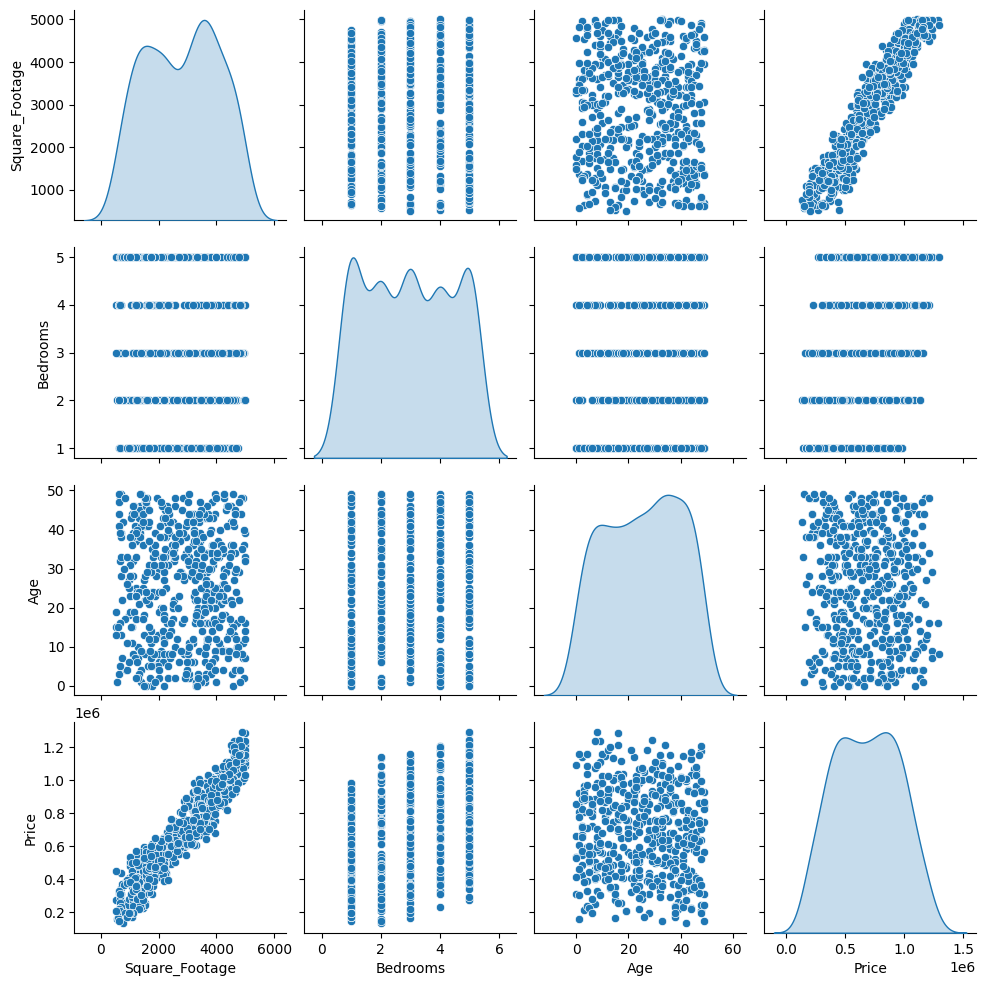

In [12]:
sns.pairplot(data, diag_kind='kde')
plt.show()


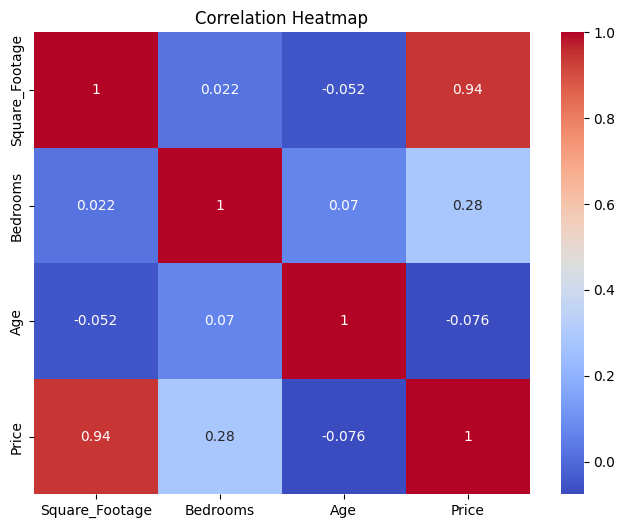

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data processing
---------------

1. Feature and Target selection

In [14]:
X = data[['Square_Footage', 'Bedrooms', 'Age']]
y = data['Price']


2. Splitting the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Tuning
------------

1. Train the model with  linear regression

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

2. Check Coeffiecent 

In [17]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [  200.34089247 49687.39919074  -890.33823584]
Model Intercept: -3081.30549757916


Model evaluation
----------------

1. Make predictions

In [22]:
y_pred = model.predict(X_test)


[ 705402.20483155  550976.07783779  933706.9717203   611867.66589204
  419143.17677266 1111297.97711292  289577.77101658  971438.23418588
  371472.90446898  839602.49550722  484350.94373575  363506.41819595
  362438.62218222  959259.85656176  890098.64869156 1038817.09087805
  590098.17484867  966539.89494837  751273.37033705  816254.44361311
  359613.23285561  947301.45355408  550093.23004778  754523.01616144
  659471.27531332  300307.20454389  387212.63503646 1023449.93481762
  486647.11765371  436478.14403405  656097.03685409  541148.41398104
 1080462.74709218  718045.48104141  864715.03958388  914093.58951434
  390064.45693459 1005156.96308475  637403.38333628  824157.30466149
  433310.57400595  858623.32858971 1001178.25251327  940850.29443908
  334615.99599433  632654.88615281  278114.148601    650549.54240538
  676391.25125124  417444.57609727  427177.42930343  514473.8848747
 1120461.97617572  595994.17753753  236865.72473697 1023770.21551262
  463105.6237368   422854.96334622 

2. Evaluation metrics

In [19]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Adjusted R^2
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"R^2: {r2}")
print(f"Adjusted R^2: {adj_r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


R^2: 0.9633267515282564
Adjusted R^2: 0.9621807125135144
MSE: 2778353470.0648885
MAE: 42621.03058073207


Visualize results
---------------

1. Residual results

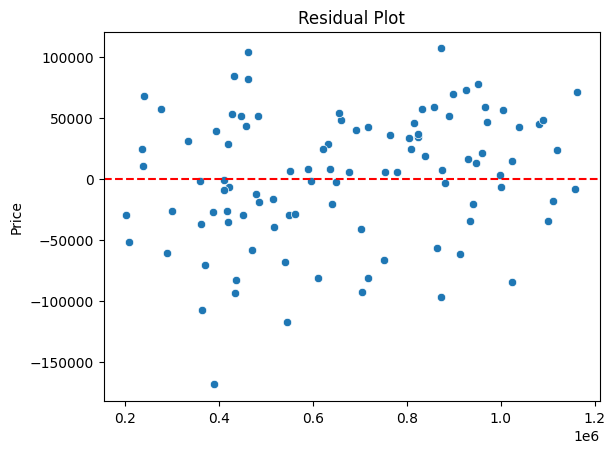

In [20]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()


2. Actual vs predicted output

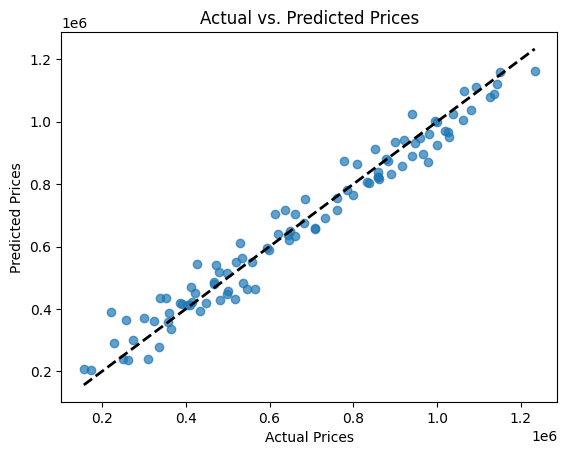

In [21]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()
